# Эксперимент Майкельсона

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle


RANDOM_SEED = 45135
np.random.seed(RANDOM_SEED)

In [2]:
speed = np.genfromtxt('speed.txt')
speed

array([299850., 299740., 299900., 300070., 299930., 299850., 299950.,
       299980., 299980., 299880., 300000., 299980., 299930., 299650.,
       299760., 299810., 300000., 300000., 299960., 299960., 299960.,
       299940., 299960., 299940., 299880., 299800., 299850., 299880.,
       299900., 299840., 299830., 299790., 299810., 299880., 299880.,
       299830., 299800., 299790., 299760., 299800., 299880., 299880.,
       299880., 299860., 299720., 299720., 299620., 299860., 299970.,
       299950., 299880., 299910., 299850., 299870., 299840., 299840.,
       299850., 299840., 299840., 299840., 299890., 299810., 299810.,
       299820., 299800., 299770., 299760., 299740., 299750., 299760.,
       299910., 299920., 299890., 299860., 299880., 299720., 299840.,
       299850., 299850., 299780., 299890., 299840., 299780., 299810.,
       299760., 299810., 299790., 299810., 299820., 299850., 299870.,
       299870., 299810., 299740., 299810., 299940., 299950., 299800.,
       299810., 2998

/opt/hostedtoolcache/Python/3.8.5/x64/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


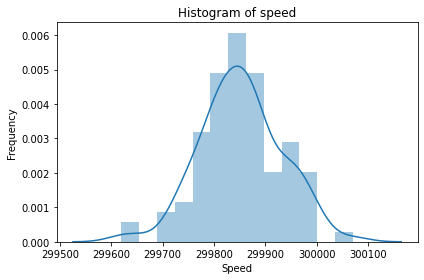

In [3]:
import seaborn as sns
sns.distplot(speed)
plt.title('Histogram of speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.tight_layout()

Можно ли считать наблюдения нормально распределёнными?

## Анализ данных

1. Постройте на одном графике оцененную при помощи ядрового метода сглаженную гистограмму (оценку плотности распределения), а также кривую плотности нормального распределения с параметрами, оцененным по выборке. (Вам помогут функции `gaussian_kde` и `norm.pdf`, из `scipy.stats`)

In [4]:
from scipy.stats import *

In [5]:
norm(speed.mean(), speed.std()).pdf(speed)

array([5.07230096e-03, 1.82604309e-03, 4.22472325e-03, 1.10087760e-04,
       3.11765795e-03, 5.07230096e-03, 2.34807989e-03, 1.35936436e-03,
       1.35936436e-03, 4.77136238e-03, 8.70860966e-04, 1.35936436e-03,
       3.11765795e-03, 1.84520887e-04, 2.54347205e-03, 4.38774911e-03,
       8.70860966e-04, 8.70860966e-04, 1.98890643e-03, 1.98890643e-03,
       1.98890643e-03, 2.72762235e-03, 1.98890643e-03, 2.72762235e-03,
       4.77136238e-03, 4.06380738e-03, 5.07230096e-03, 4.77136238e-03,
       4.22472325e-03, 5.01192918e-03, 4.87278996e-03, 3.70337165e-03,
       4.38774911e-03, 4.77136238e-03, 4.77136238e-03, 4.87278996e-03,
       4.06380738e-03, 3.70337165e-03, 2.54347205e-03, 4.06380738e-03,
       4.77136238e-03, 4.77136238e-03, 4.77136238e-03, 5.05100683e-03,
       1.22881496e-03, 1.22881496e-03, 6.42295793e-05, 5.05100683e-03,
       1.65763416e-03, 2.34807989e-03, 4.77136238e-03, 3.88003352e-03,
       5.07230096e-03, 4.94907177e-03, 5.01192918e-03, 5.01192918e-03,
      

/opt/hostedtoolcache/Python/3.8.5/x64/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


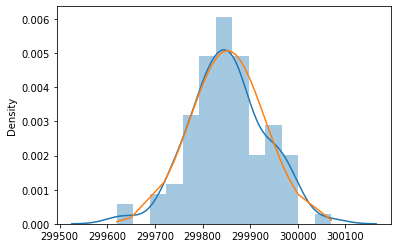

In [6]:
sns.distplot(speed)
s = speed.copy()
s.sort()
plt.plot(s, norm(s.mean(), s.std()).pdf(s))
plt.show()

2. Постройте на одном графике эмпирическую функцию распределения (emperical CDF), а также кривую функции распределения нормального распределения (CDF) с параметрами, оцененным по выборке. Добавьте доверительный интервал на график. (Используйте `ECDF` из `statsmodels.api`)

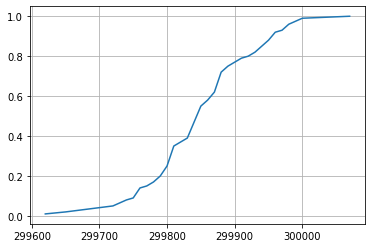

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.plot(s, ECDF(s)(s))
plt.grid(True)
plt.show()

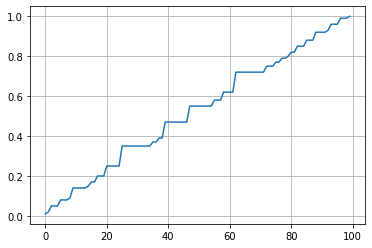

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.plot(ECDF(s)(s))
plt.grid(True)
plt.show()

3. Постройте Q-Q plot для данных. Похожи ли данные на нормальное распределение? (Вам поможет функция `qqplot` из `statsmodels`)

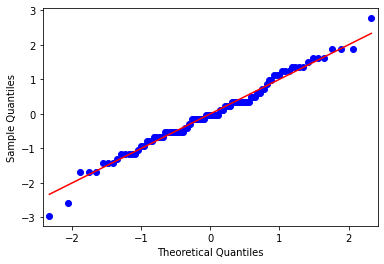

In [9]:
from statsmodels.graphics.gofplots import *
qqplot(s, line='s', fit=True)
plt.show()

# Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [10]:
rats = pd.read_table("rats.txt", sep="\t")
shuffle(rats)

,lifespan,diet
97,1258,restricted
61,1076,restricted
7,390,restricted
104,1393,restricted
134,667,ad libitum
...,...,...
119,582,ad libitum
142,684,ad libitum
190,838,ad libitum
15,718,restricted


In [11]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan']
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan']

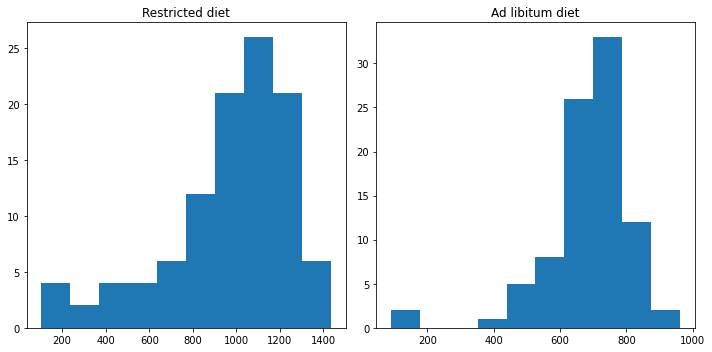

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Restricted diet')
plt.hist(x1)
plt.subplot(1, 2, 2)
plt.title('Ad libitum diet')
plt.hist(x2)
plt.tight_layout()

1. Нарисуйте один график с двумя boxplot на нем (для каждой из диет). Укажите на графике 95% доверительный интервал для каждой из медиан. В этом вам поможет функция boxplot(..., notch=TRUE), которой первым аргументом можно передать объект типа формула.

## Нормальность

2. Проверим нормальность двух выборок (для каждой из диет). Для этого нарисуйте qq-график и отметьте на нем прямую линию, соответствующую идеальным теоретическим квантилям нормального распределения. Похожи ли данные на нормальное распределение?

3. Попробуйте исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой) и снова нарисовать qq-графики. Можно ли применять к этим данным критерии, основанные на предположении о нормальности?

Усечённые выборки можно считать практически нормальными.

## Сравнение средних

Проверьте нулевую гипотезу

$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

против следующих альтернатив:

$H_1$: крысы на строгой диете живут дольше.

$H_1$: средняя продолжительность жизни крыс меняется при ограничении диеты. 

В этом задании вам поможет функция `ttest_ind`, которая реализует критерий Стьюдента.